# Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Importing The Dataset

In [2]:
from urllib.request import urlretrieve

In [8]:
iris = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
urlretrieve(iris)
df = pd.read_csv(iris, sep=',')
df.columns = ['sepal_length','sepal_width','petal_length','petal_width','species']
df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
5,4.6,3.4,1.4,0.3,Iris-setosa
6,5.0,3.4,1.5,0.2,Iris-setosa
7,4.4,2.9,1.4,0.2,Iris-setosa
8,4.9,3.1,1.5,0.1,Iris-setosa
9,5.4,3.7,1.5,0.2,Iris-setosa


# Data Analysis

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  149 non-null    float64
 1   sepal_width   149 non-null    float64
 2   petal_length  149 non-null    float64
 3   petal_width   149 non-null    float64
 4   species       149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [10]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
# Printing the number of types , the iris flower can be  classified into:

print(df['species'].value_counts())

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        49
Name: species, dtype: int64


<Axes: xlabel='species', ylabel='count'>

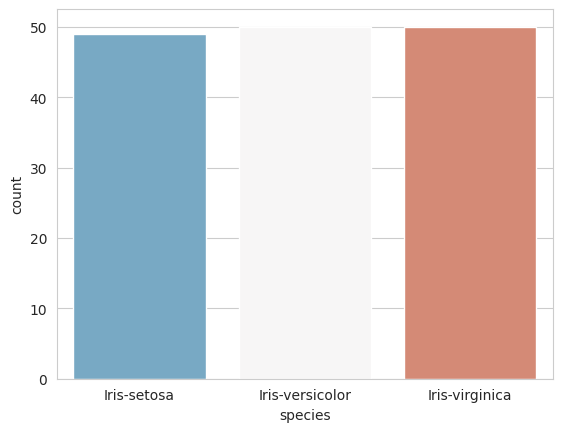

In [17]:
sns.set_style('whitegrid')
sns.countplot(x='species',data=df,palette='RdBu_r')

## Data Visualization Using Boxplots

Using boxplots , we can easily visualize which column has more impact on the classification.

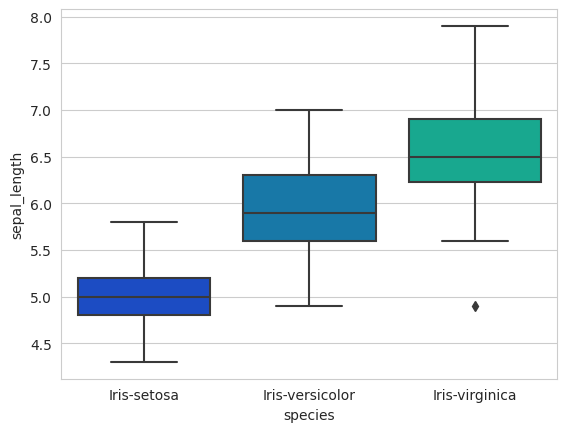

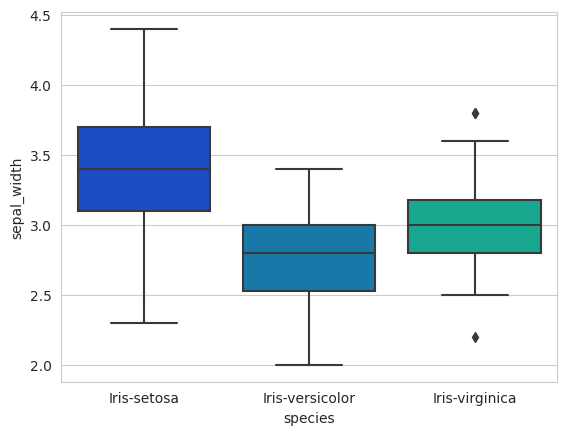

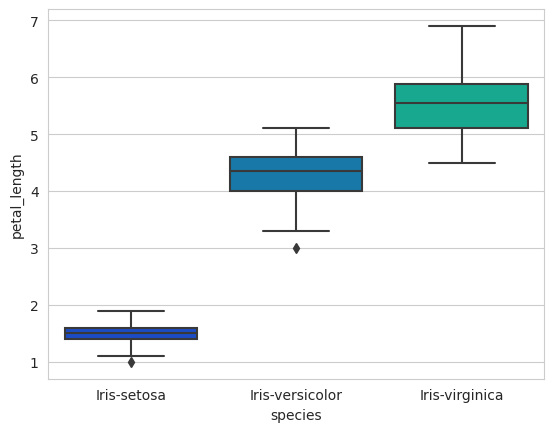

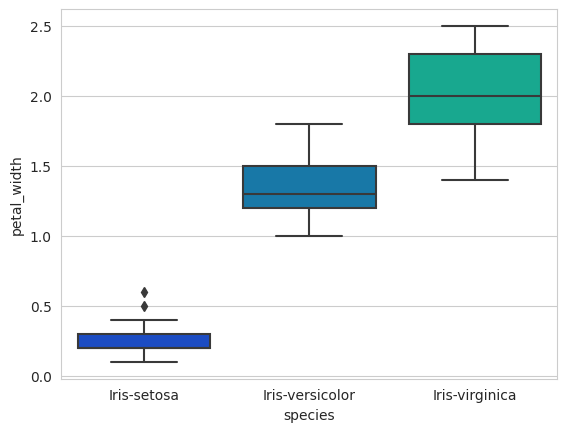

<Figure size 640x480 with 0 Axes>

In [18]:
l=list(df.columns[0:])
for i in range(len(l)-1):
    sns.boxplot(x='species',y=l[i], data=df, palette='winter')
    plt.figure()

# Training and prediction

### Train Test Split

In [20]:
features = df.drop('species', axis=1)
features.head()

,sepal_length,sepal_width,petal_length,petal_width
0,4.9,3.0,1.4,0.2
1,4.7,3.2,1.3,0.2
2,4.6,3.1,1.5,0.2
3,5.0,3.6,1.4,0.2
4,5.4,3.9,1.7,0.4


In [21]:
target = df['species']
target.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: species, dtype: object

In [23]:
# using test_train_split library to split our data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=101)

In [31]:
print("Features data used for training the model is : ", X_train.shape)
print("Target data used for training the model is : ", y_train.shape)
print("Features data used for testing the model is : ", X_test.shape)
print("Target data used for training the model is : ", y_test.shape)

Features data used for training the model is :  (119, 4)
Target data used for training the model is :  (119,)
Features data used for testing the model is :  (30, 4)
Target data used for training the model is :  (30,)


# Model Training

Here, we will use the support vector machine classifier as our model , due to its accuracy in classification problems.

In [32]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train,y_train)

SVC()

# Predictions and Evaluations

In [35]:
predictions = model.predict(X_test)

In [39]:
Prediction_df = pd.DataFrame({'Actual':y_test,'Prediction':predictions})
Prediction_df

,Actual,Prediction
16,Iris-setosa,Iris-setosa
55,Iris-versicolor,Iris-versicolor
124,Iris-virginica,Iris-virginica
89,Iris-versicolor,Iris-versicolor
32,Iris-setosa,Iris-setosa
92,Iris-versicolor,Iris-versicolor
91,Iris-versicolor,Iris-versicolor
118,Iris-virginica,Iris-versicolor
69,Iris-versicolor,Iris-virginica
1,Iris-setosa,Iris-setosa


In [36]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))

[[ 9  0  0]
 [ 0 11  1]
 [ 0  1  8]]


In [37]:
print(classification_report(y_test,predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       0.92      0.92      0.92        12
 Iris-virginica       0.89      0.89      0.89         9

       accuracy                           0.93        30
      macro avg       0.94      0.94      0.94        30
   weighted avg       0.93      0.93      0.93        30

